# BL40A2030 Wireless Communication Networks

## Week 5 - Assignment

### Author: Jaime Arturo Álvarez Orgaz

**1. (Scaling laws) Plot the throughput capacity for random networks with immobile nodes considering both the protocol and the physical model. Eq.(22) and (23) from [5].**

(a) What does this result mean in terms of how much bits per second can flow in the network when the number of nodes increases?

(b) Cite two ways to improve the throughput capacity of wireless networks that is given in [5]. Make a brief comment with your own words about these two solutions (pro and con). 

*Hint: The "big O" [notation](https://en.wikipedia.org/wiki/Big_O_notation) provides asymptotic boundaries of functions. In other words, what happens with the function when $n$ grows large (to infinity). It is not the function but lower and/or upper bounds. For example, the plot I wish tells that the throughput asymptotically behaves with the number of nodes in the network. In this case, the throughput capacity scales down with this number following the equations. In this sense, $W$ is a constant so one can set $W=1$ (bits/s). Note that the equations are the same, telling that they have indeed the same scaling in throughput capacity. In other words, both models have the same fundamental limit for random networks (what is not the case for arbitrary -- i.e. I decide where to put the nodes -- networks).*

**2. (Interference empirical distribution) Let us analyze the effect of the newtork size in the interference distribution for the same network density (expected number of interferers per unit of area). Follow the implementation of the "path-loss model 2" given in the tutorial. Consider the pathloss exponent $\alpha=3$, the density of $0.1$ node$/m^2$ and a square network of $L \times L$. Plot the empirical distribution for:** 

(a) $L = 5$ 

(b) $L = 10$

(c) $L = 20$

(d) $L = 100$

(e) Do you see any difference? Why?

*Hint: To keep the same density: mean_poisson = density $\times L^2$*



**3. (Outage probability) Follow the tutorial to investigate the effect of the SIR threshold $\beta$ in the outage probability, defined as (1 - success probability).**

(a) Plot the outage probability as a function of $\beta>1$ for: d=1, alpha=4, L=10, mean_poisson= 10, trials=10000. Plot $\beta$ from 1 to 15.

(b) Consider that the threshold $\beta$ is related to the channel capacity $\log_2(1+\beta)$ by treating the "interference as noise". This value indicates the maximum achieved spectral efficiency by the link in bits/s/Hz. Plot $\log_2(1+\beta)$ as a function of $\beta$, also from 1 to 15.

(c) Discuss the trade-off involved in the outage probability and the spectral efficiency that is controlled by the threshold $\beta$.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
from scipy.spatial import distance
#Not to show warning messages (to keep the notebook clean)
import warnings

warnings.filterwarnings('ignore')

**1**

Text(0, 0.5, 'Capacity')

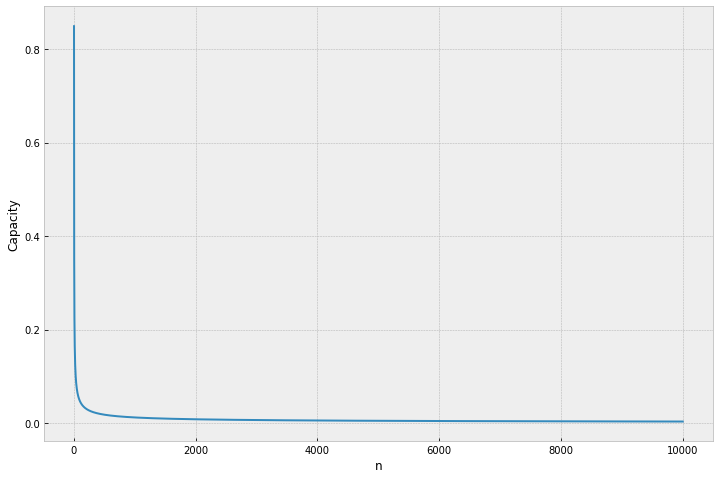

In [2]:
n = np.arange(0,10000)
W = 1

plt.figure(figsize=(12,8))

tc = [W / (np.sqrt(i*np.log(i))) for i in n ]
plt.plot(n, tc)

plt.xlabel("n")
plt.ylabel("Capacity")

**1.A**

When the number of nodes increases, the bit per second that can flow in the network decreases. The throughput capacity for random network capacities in both protocols will decrease with the increase of the nodes. 

**1.B**

Since the algorithm efficiency is denoted by O, this algorithm isn't going to run with the same velocity on every machine. Machines with more threads and cores on the CPU will run the algorithm much more faster. Intel implements in some of their CPU'S hyperthreading. This means that it can use multiple threats simultaneosly to do tasks faster. This could be beneficial for these kinds of algorithms.

**2**

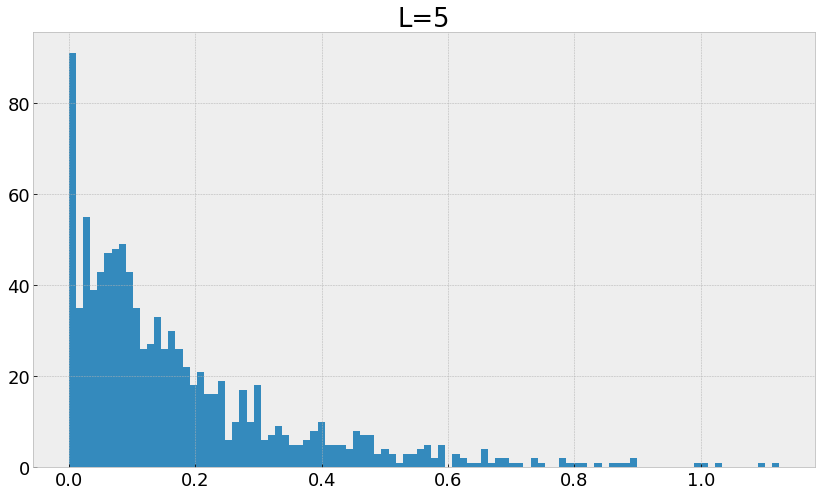

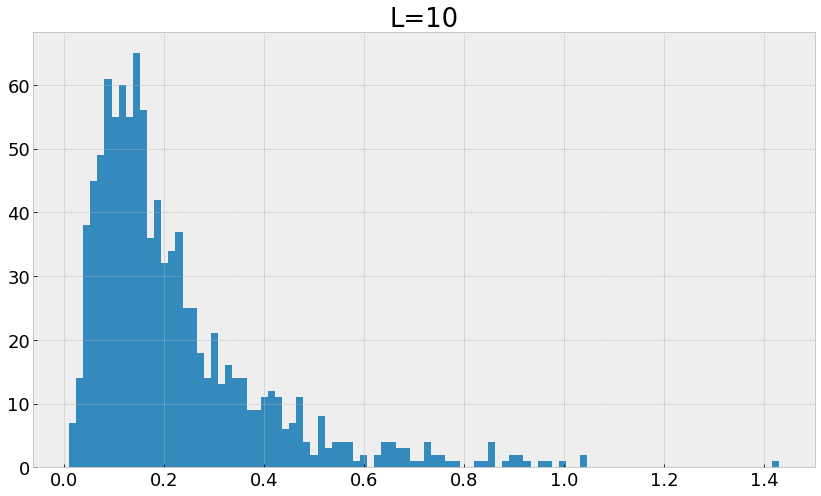

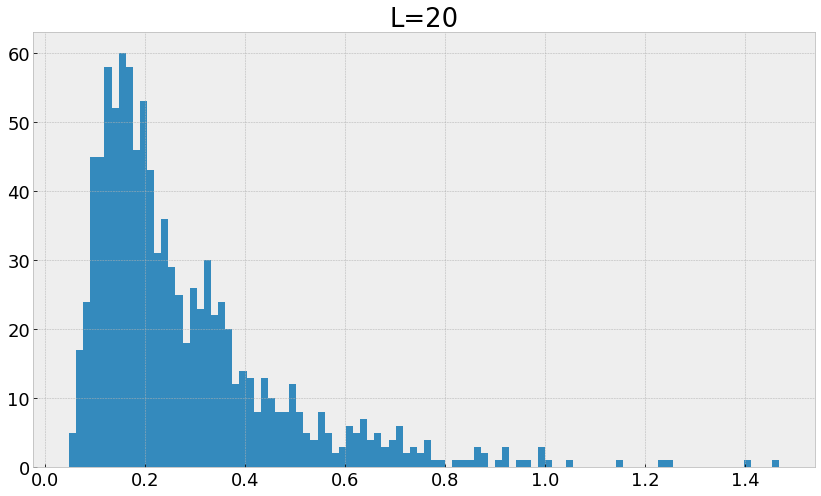

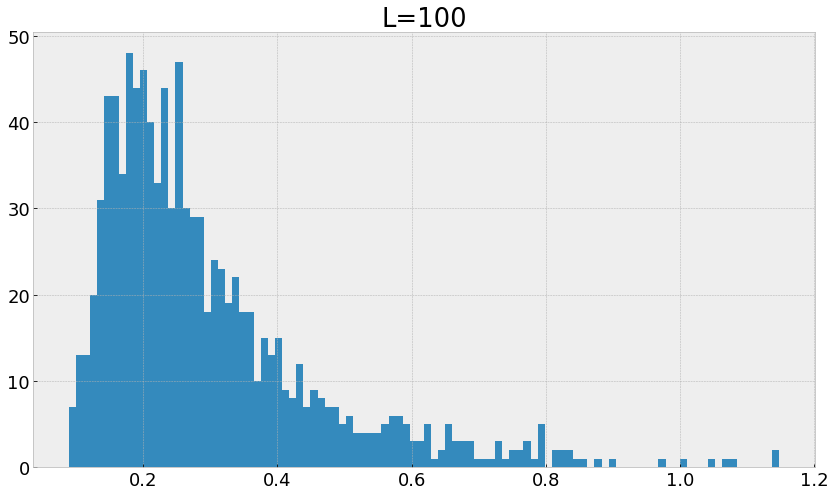

In [3]:
#Number of trials
trials = 1000

#Network size (square)
L1 = 5
L2 = 10
L3 = 20
L4 = 100

ArrL = [L1, L2, L3, L4]

for L in ArrL:
    mean_poisson = 0.1 * L **2
    
    #Path-loss exponent
    alpha = 3
    interference = np.zeros(trials)
    
    for j in range(trials):   
        #Number of nodes
        n = np.random.poisson(mean_poisson)
        #
        
        #Uniform distribution in x
        position_x_realization = np.random.uniform(-L/2,L/2,n)

        #Uniform distribution in y
        position_y_realization = np.random.uniform(-L/2,L/2,n)
        ##
        
        #Manipulating arrays to compute distances
        position_x_realization_t = np.transpose(position_x_realization) 
        position_y_realization_t = np.transpose(position_y_realization) 
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        
        #position_final
        ###############
        
        #The distance to the rx1 (0,0)
        ###
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
        interference_i = []
        interference_i = [(1+distance_rx[i])**(-alpha) for i in range(n)]
        interference[j] = np.sum(interference_i)

    ###Plot
    plt.rcParams.update({'font.size': 18})
    plt.figure(figsize=(14,8))
    plt.hist(interference, bins = 100)
    plt.title(f"L={L}")
    plt.show()

**2.E**

The biggest difference i can notice is in L5. When L5 is at 0 on the X axis, the interference is the lowest. Then is incresing consistently through the X axis. 

**3**

In [4]:
def suc_prob(d,beta,alpha,L,mean_poisson,trials):
    interference = np.zeros(trials)
    success = 0
    for j in range(trials):   
        #Number of nodes
        n = np.random.poisson(mean_poisson)
        #
        #Uniform distribution in x
        position_x_realization = np.random.uniform(-L/2,L/2,n)

        #Uniform distribution in y
        position_y_realization = np.random.uniform(-L/2,L/2,n)
        ##
        #Manipulating arrays to compute distances
        position_x_realization_t = np.transpose(position_x_realization) 
        position_y_realization_t = np.transpose(position_y_realization) 
        position_final = []
        position_final = [[position_x_realization_t[i], position_y_realization_t[i]] for i in range(n)]
        #position_final
        ###############
        #The distance to the rx1 (0,0)
        ###
        distance_rx = []
        distance_rx = [distance.euclidean(position_final[i],[0,0]) for i in range(n)]
        interference_i = []
        interference_i = [distance_rx[i]**(-alpha) for i in range(n)]
        if np.sum(interference_i) * beta < d**(-alpha): 
            success = success + 1
    return success/trials

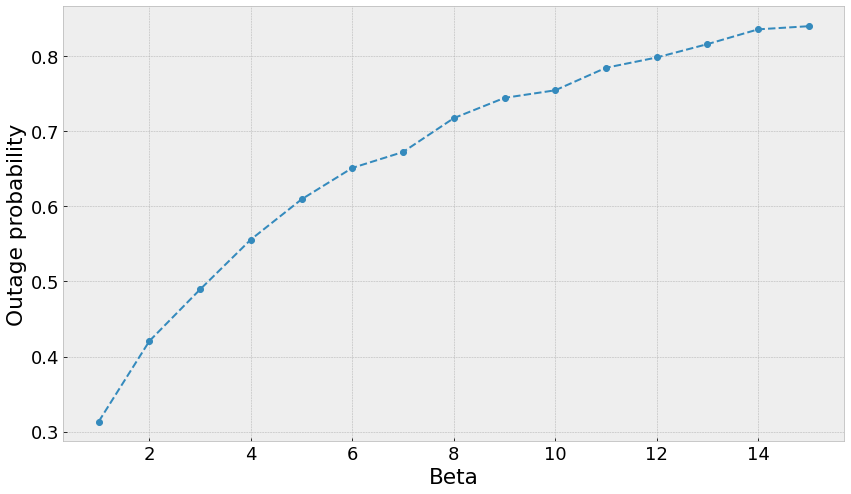

In [5]:
beta = range(1,16)

##ot_prob = []
#ot_prob = [suc_prob(d,beta,alpha,L,mean_poisson,trials) for i in beta]
ot_prob = [suc_prob(d=1,beta=i,alpha=4,L=10,mean_poisson=10,trials=10000) for i in beta]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))
plt.plot(beta,  np.ones(15) - ot_prob,'o--' ,label=r'$\alpha=4$')
plt.xlabel("Beta")
plt.ylabel("Outage probability")
plt.show()

**3.B**

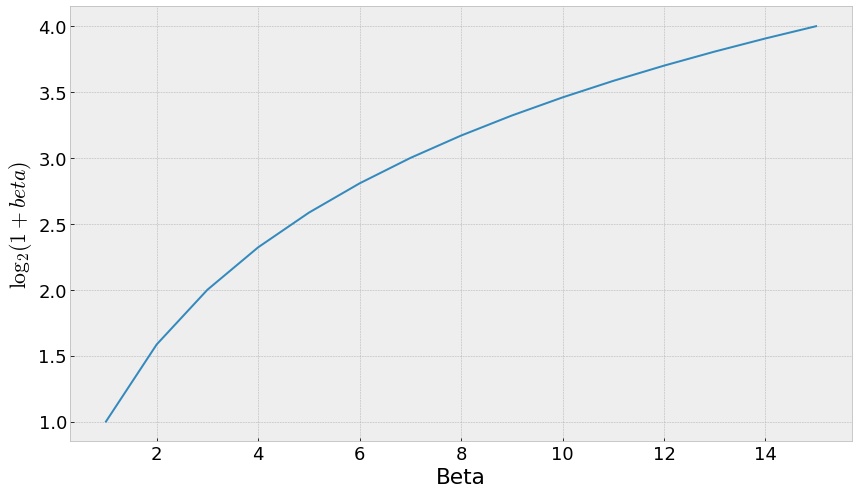

In [6]:
beta = range(1,16)
trials = 10000

density = []
density = [np.log2(1+i) for i in beta]

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(14,8))

plt.plot(beta, density)
plt.xlabel("Beta")
plt.ylabel("$\log_2(1+beta)$")
plt.show()

**3C**

Both increase throught the X axis (beta axis). If outage probability increases, spectral efficiency will increase and viceversa. 